In [1]:
import numpy as np
import pickle as pk
import pandas as pd
from matplotlib import pyplot as plt

from brainspace.utils.parcellation  import map_to_labels, reduce_by_labels
import hcp_utils as hcp
from surfplot import Plot
from neuromaps.datasets import fetch_fslr
import numpy as np

from brainspace.datasets  import load_parcellation
from lib.plotting import plot_corr_scores, plot_bars 
from matplotlib.colors import ListedColormap
from lib.plotting import basic_lines


root = r"C:\tmp\OwnCloud\docs\neuroconnlab\dist_model\git\\"

def fxdcolorbar(mappable, *args,**kwargs): from mpl_toolkits.axes_grid1 import make_axes_locatable; last_axes = plt.gca(); ax = mappable.axes; fig = ax.figure; divider = make_axes_locatable(ax);  cax = divider.append_axes("right", size="5%", pad=0.05); cbar = fig.colorbar(mappable, cax=cax, *args,**kwargs); plt.sca(last_axes); return cbar;

c:\tmp\tools\Python38\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [2]:
surfaces = fetch_fslr()
lh, rh = surfaces['inflated']



def show_pdata(data, ld = None, is_32k=False, cmap="coolwarm", mw_val=0, title=None, **kwargs):
  out = data if ld is None else map_to_labels(data, ld, mask=ld!=mw_val, fill=0)
  lcd = hcp.left_cortex_data(out) if not is_32k else out;
  p = Plot(surf_lh=lh, size=(800, 300))
  pkwargs = dict(cmap=cmap, cbar=True);
  pkwargs.update(kwargs)
  p.add_layer({'left': lcd},  **pkwargs)
  fig = p.build()
  if not(title is None): fig.axes[0].set_title(title)
  #fig.show()
  return fig

import io, PIL
def fig2pil(fig, pad_inches=0.02):
  buf = io.BytesIO()
  fig.savefig(buf, bbox_inches="tight", pad_inches=pad_inches);
  buf.seek(0)
  return PIL.Image.open(buf)

# load the nessesary data and info

In [3]:
coeffs = np.load(root + "results/scores/rs_pca.lin_weights.200.spatial_zscore.yfull.npy")
print("Linear coefficients:", coeffs.shape)
best_coeffs = np.argsort(np.absolute(coeffs), axis=1)[:,::-1]
print("Best coefficients by task:", best_coeffs.shape);


unique_contrasts = np.loadtxt(root + "data/task_contrasts_47_unique_names.txt", dtype=str);
#contrast_ids_to_show = [8, 38, 16, 2, 27, 24, 5, 44, 21]
#tnames_mid = ["Lang S-M", "WM2-0", "Motor Cue-Avg", "Emoti Face-Shape", "Social TOM-Rand", "Rel-Match", "Gamble Rew-Pun" ,"WM Face-Av", "Motor T-Avg"]
task_names = ["Language", "Motor", "Emotion", "WM", "Social", "Relational", "Gambling"]
contrast_ids_to_show = [8, 16, 2, 38, 27, 24, 5]

mean_task_maps = np.load(root + "results/retest_hcp40.test.mean_task_maps47.from_zscored.npy", allow_pickle=1).item()["mean_task_maps"]

print("Mean task maps shape:", mean_task_maps.shape)

Linear coefficients: (47, 200)
Best coefficients by task: (47, 200)
Mean task maps shape: (29696, 47)


In [4]:
unique_contrasts[np.array(contrast_ids_to_show)]

array(['LANGUAGE_STORY-MATH', 'MOTOR_CUE-AVG', 'EMOTION_FACES-SHAPES',
       'WM_2BK-0BK', 'SOCIAL_TOM-RANDOM', 'RELATIONAL_REL-MATCH',
       'GAMBLING_REWARD-PUNISH'], dtype='<U22')

In [5]:
# if instead the contribution values calculated above should be used:
#pl = np.load(""results/scores/rs_pca.lin_weight_onebyone_contrib.values.diff.spatial_zscore.yresid.npy", allow_pickle=1).item();
#best = pl["best"]; unique_contrasts = pl["unique_contrasts"]; contrast_ids_to_show=pl["contrast_ids_to_show"]; contr = pl["contr"]; 

pca = pk.load(open(root + "data/group_conmat_pca.200c.pkl",'rb')) 
print("Group PCA components:", pca.components_.shape)

#p = np.load(root + "data/all_cortical_reference_maps.fslr32k.l29.npy", allow_pickle=1).item()
p = np.load(root + "data/all_cortical_reference_maps_v2.fslr32k.l29.npy", allow_pickle=1).item()
refmaps= p["refmaps"]; refnames = p["names"];

source = ["Yeo7"]*7 + ["Yeo17"]*17 + ["CA"]*12 + ["DearGenes"]*3 + ["Neuromaps"]*12 + ["fcgrads"]*10 + ["CellTypes"]*24 + ["Receptors"]*16;

print("Reference maps:", refmaps.shape, len(source), "\nE.g.", refnames[:5])

Group PCA components: (200, 29696)
Reference maps: (101, 29696) 101 
E.g. ['yeo7_Visual', 'yeo7_Somatomotor', 'yeo7_Dorsal Attention', 'yeo7_Ventral Attention', 'yeo7_Limbic']


c:\tmp\tools\Python38\lib\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator PCA from version 1.0.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


#  Plot the model weights per component and task

## Raw Coefficients by task

In [6]:
regr_data = np.load("results/scores/linear_regression_scores_and_info_v3.yfull.aa.extended.small.npy", allow_pickle=1).item()
print(regr_data.keys(), "\n", regr_data['RS-PCA200'].keys())
np.all(regr_data['RS-PCA200']["skr"].coef_ ==coeffs)

c:\tmp\tools\Python38\lib\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator LinearRegression from version 1.0.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


dict_keys(['RS-PCA200', 'FS-StructuralMaps']) 
 dict_keys(['scoresd', 'diff_scores_test', 'y_test', 'y_test_pred', 'skr', 'sub_test'])


True

0.5229514


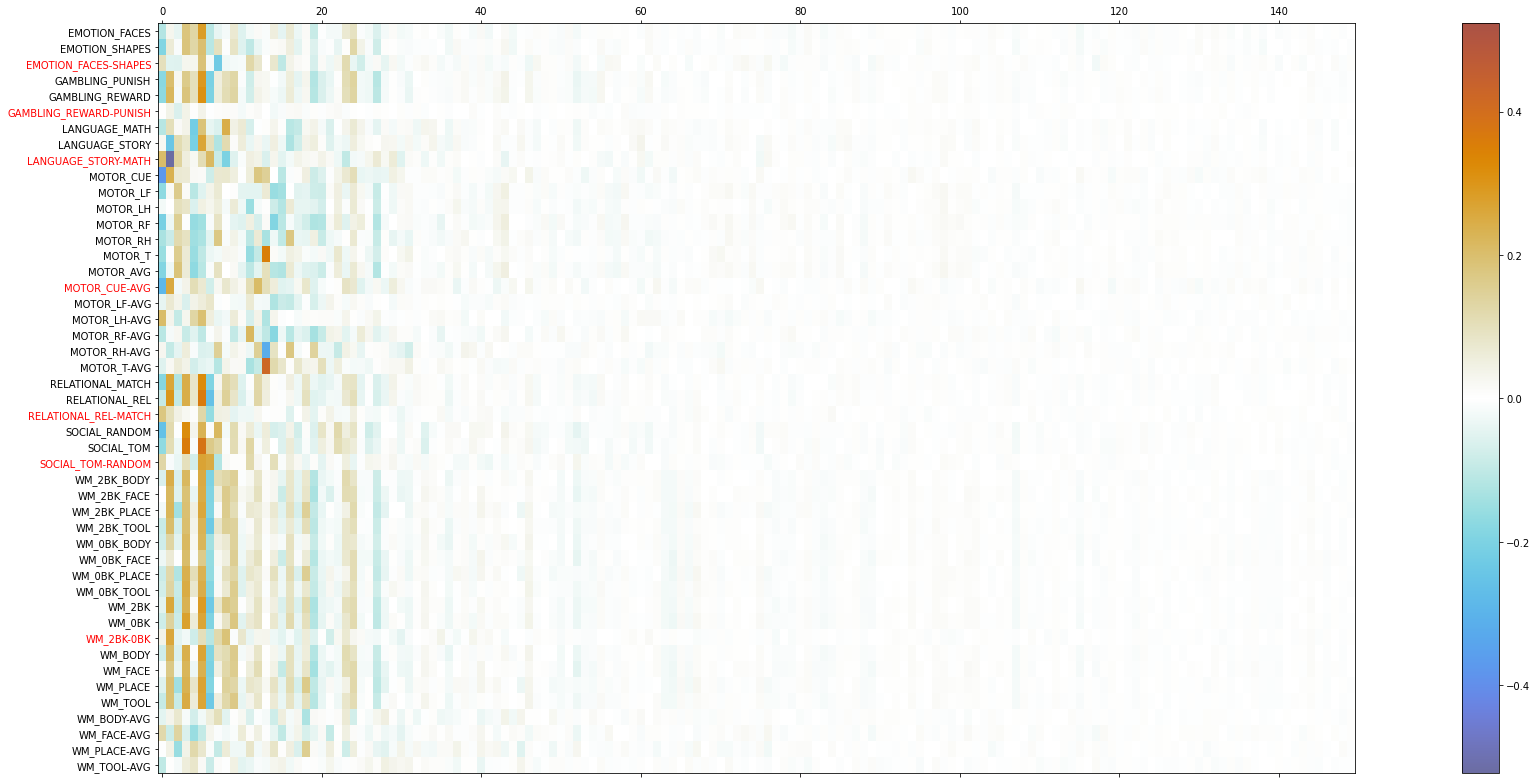

In [7]:
# Plotting of the raw coefficeients
import cmasher as cmr
cmap_coeffs = "cmr.prinsenvlag_r" 

#coef= regr_data_sm['RS-PCA200']["skr"].coef_

v = np.absolute(coeffs).max()
print(v)
ax = plt.figure(figsize=(30,11)).gca()
im = ax.matshow(coeffs[:,:150], cmap =cmap_coeffs , vmin=-v, vmax=v, aspect=2); plt.colorbar(im, ax=ax)#fxdcolorbar(im);
plt.yticks(np.arange(len(unique_contrasts)), unique_contrasts);
for label in np.array(ax.get_yticklabels())[contrast_ids_to_show]: label.set_color("red")

plt.tight_layout()

In [8]:
# plt.rcParams["font.size"] default is 10
plt.rcParams.update({'font.size': 20})

0.5229514


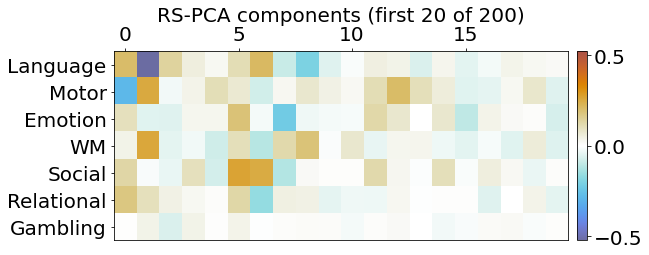

In [9]:
fig, axs = plt.subplots(1,1, figsize=(8*1.2,3.9*1.2)) # 4 plots in a row

axs=[axs];

coeffs2show = coeffs[contrast_ids_to_show,:]
best_coefficients = np.argsort(np.absolute(coeffs2show), axis=1)[:,::-1]

n_comps = 20;
data = coeffs2show[:,:n_comps]
v = np.absolute(data).max()
print(v)

aspr=(data.shape[1]/data.shape[0])/2.4
im = axs[0].matshow(data, cmap = cmap_coeffs, vmin=-v, vmax=v, aspect=aspr); 
#for (i, j), z in np.ndenumerate(coeffs2show): 
#  if j in best_coefficients[i,:3]: plt.text(j, i, '{:.2f}'.format(z), ha='center', va='center', size=5)

plt.colorbar(im,fraction=0.020, pad=0.02, ax=axs[0]);#fxdcolorbar(im, ax=axs[0]);#plt.colorbar(im, ax=axs[0]);
axs[0].set_yticks(np.arange(len(task_names))); axs[0].set_yticklabels( task_names);
axs[0].set_xlabel(f"RS-PCA components (first {n_comps} of 200)"); axs[0].xaxis.set_label_position('top') 
plt.tick_params(axis='x',  which='both', bottom=False,top=True, labelbottom=False)
plt.tight_layout()

In [12]:
idxs = np.argsort(np.abs(coeffs), axis=1)
for n in range(len(task_names)):
  tn = contrast_ids_to_show[n]
  txt = f"ten biggest coeffs for {unique_contrasts[tn]} ";
  print(txt, (44-len(txt))*" ", "at components:\t", idxs[tn][::-1][:10])

ten biggest coeffs for LANGUAGE_STORY-MATH    at components:	 [ 1  6  0  8  2  5 23  7 27 29]
ten biggest coeffs for MOTOR_CUE-AVG          at components:	 [ 0  1 12 11  4 13 23 18  6  8]
ten biggest coeffs for EMOTION_FACES-SHAPES   at components:	 [ 7  5 11 23 15  0 14 25 12 19]
ten biggest coeffs for WM_2BK-0BK             at components:	 [ 1  8  7  6  5  4 10 21 23 18]
ten biggest coeffs for SOCIAL_TOM-RANDOM      at components:	 [ 5  6  0 11  7 14  3  4 16 23]
ten biggest coeffs for RELATIONAL_REL-MATCH   at components:	 [ 0  6  5  1 16 24  7 19  8  2]
ten biggest coeffs for GAMBLING_REWARD-PUNISH   at components:	 [ 2  3  1  5 14 17 10 12 22 16]


In [13]:
idxs = np.argsort(np.abs(coeffs), axis=1)
for n in range(len(task_names)):
  txt = f"ten biggest coeffs for {task_names[n]} ";
  tn = contrast_ids_to_show[n]
  print(txt, (44-len(txt))*" ", "at components:\t", end="")
  for c in idxs[tn][::-1][:5]:
     print(f"c{c}", coeffs[tn, c], end=" | ")
  print("")

ten biggest coeffs for Language               at components:	c1 -0.5229514 | c6 0.21351421 | c0 0.20561004 | c8 -0.20145768 | c2 0.13977914 | 
ten biggest coeffs for Motor                  at components:	c0 -0.28750518 | c1 0.253927 | c12 0.2060372 | c11 0.10900811 | c4 0.105446905 | 
ten biggest coeffs for Emotion                at components:	c7 -0.2230228 | c5 0.1878548 | c11 0.1251691 | c23 0.114760116 | c15 -0.10180624 | 
ten biggest coeffs for WM                     at components:	c1 0.2605337 | c8 0.187167 | c7 0.12146126 | c6 -0.112192646 | c5 0.10218103 | 
ten biggest coeffs for Social                 at components:	c5 0.26892942 | c6 0.25029197 | c0 0.12837489 | c11 0.121233836 | c7 -0.11868576 | 
ten biggest coeffs for Relational             at components:	c0 0.17538586 | c6 -0.16242297 | c5 0.12769008 | c1 0.10118602 | c16 -0.052684985 | 
ten biggest coeffs for Gambling               at components:	c2 -0.061508536 | c3 0.039672434 | c1 0.038618 | c5 0.036457628 | c14 -0.021

#  Feature-pertubation analysis

In [14]:
p = np.load(root + "results/scores/pertubation_pca.yfull.from_zscored.npy", allow_pickle=1).item()
dscores = p["dscores"]; cscores = p["cscores"]; baseline_diff = p["baseline_diff"]; baseline_corr =p["baseline_corr"];
print(p.keys())

diff = (baseline_diff - np.array(dscores)) # diff shape (30,10)
corr = (baseline_corr - np.array(cscores)) # diff shape (30,10)
diff.shape

dict_keys(['dscores', 'cscores', 'baseline_diff', 'baseline_corr', 'skr'])


c:\tmp\tools\Python38\lib\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator LinearRegression from version 1.0.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


(200, 47)

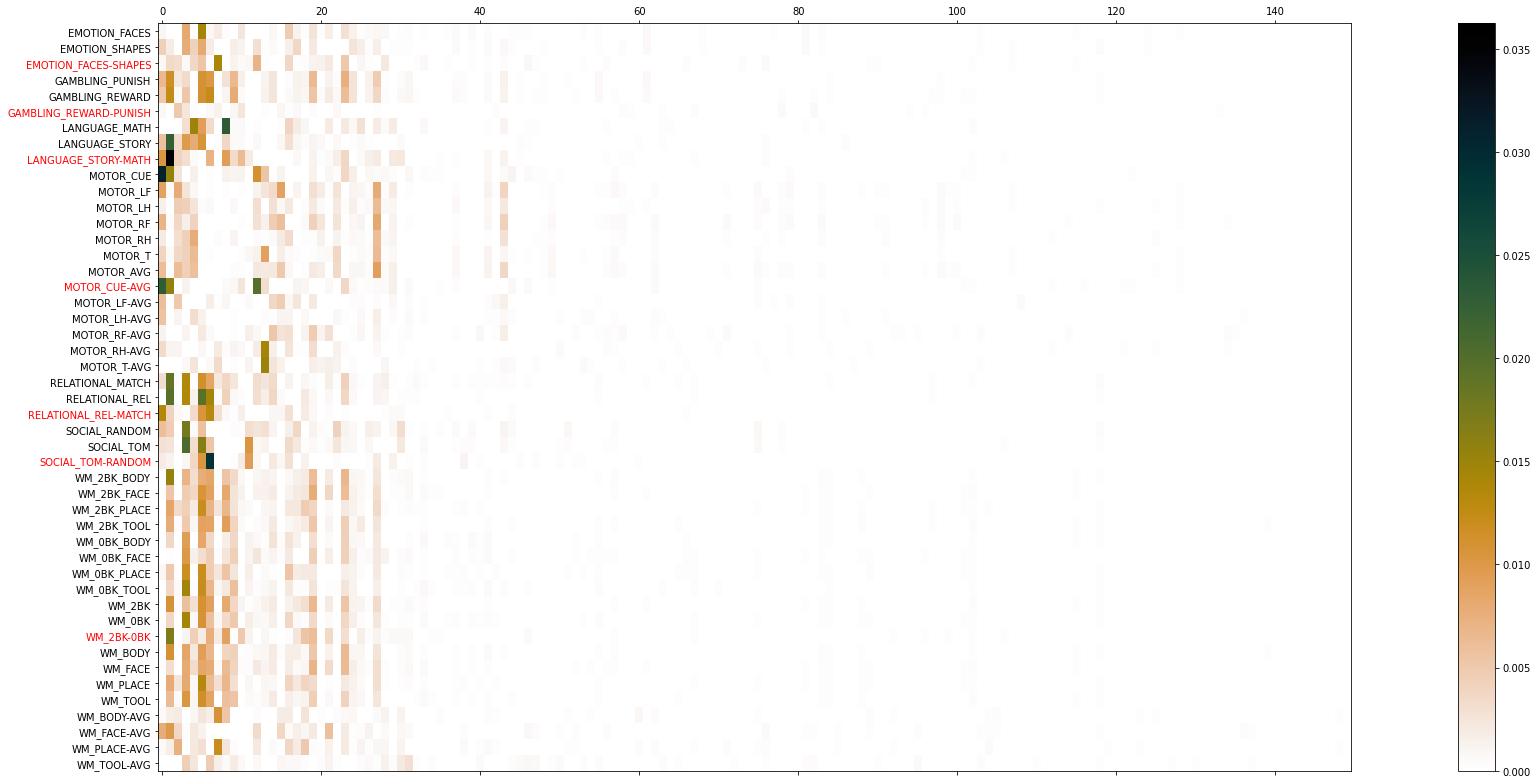

In [16]:
cmap_seq = "cmr.savanna_r"#"cmc.batlow"#" #cmc.vik #"PiYG"
plt.rcParams.update({'font.size': 10})
v = np.absolute(diff).max()
ax = plt.figure(figsize=(30,11)).gca()
im = ax.matshow(diff.T[:,:150], cmap =cmap_seq , vmin=0, vmax=v*0.5, aspect=2); plt.colorbar(im, ax=ax)#fxdcolorbar(im);
plt.yticks(np.arange(len(unique_contrasts)), unique_contrasts);
for label in np.array(ax.get_yticklabels())[contrast_ids_to_show]: label.set_color("red")

plt.tight_layout()
#plt.savefig("results/plots/XXrs_pca.lin_weight_onebyone_contrib.diff.200.spatial_zscore.yfull.png")

# Releationship between PCA components and reference maps

In [17]:
# calculate the correlation between components and reference maps
"""
def np_pearson_cor(x, y):
    # x and y of shape (n_features, n_vars)
    xv = x - x.mean(axis=0)
    yv = y - y.mean(axis=0)
    xvss = (xv * xv).sum(axis=0)
    yvss = (yv * yv).sum(axis=0)
    result = np.matmul(xv.transpose(), yv) / np.sqrt(np.outer(xvss, yvss))
    # bound the values to -1 to 1 in the event of precision issues
    return np.maximum(np.minimum(result, 1.0), -1.0)

corrs = np_pearson_cor(pca.components_.T, refmaps.T)
print(corrs.shape, corrs.max(), corrs.min())"""

import scipy.stats

def pearson_correlation(mapset1, mapset2):
    corrs = np.zeros((len(mapset1), len(mapset2)));
    for i, map1 in enumerate(mapset1):
        for j, map2 in enumerate(mapset2):
            c = np.vstack([map1,map2])
            d = c[:,~np.any(np.isnan(c), axis=0)]
            r,p= scipy.stats.mstats.pearsonr(d[0],d[1])
            #r= np_pearson_cor(d[0],d[1])
            corrs[i,j] =r
    return corrs

corrs = pearson_correlation(pca.components_, refmaps)
corrs.shape

(200, 101)

In [18]:
import scipy
zrefmaps= scipy.stats.zscore(refmaps.T, axis=0, nan_policy="omit").T
#corrsz = np_pearson_cor(pca.components_.T, zrefmaps.T)
corrsz = pearson_correlation(pca.components_, zrefmaps)
corrsz.shape

(200, 101)

## Plot the correlation matrix 

0.7251827607536145 -0.5278093707538944 0.0003820373374656477


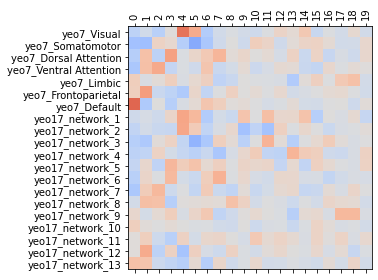

In [19]:

ax = plt.figure(figsize=(10,4)).gca()
ax.matshow(corrs[:20,:20].T, vmin=-1, vmax=1, cmap="coolwarm")
plt.yticks(np.arange(refmaps.shape[0])[:20], refnames[:20]);
plt.xticks(np.arange(corrs.shape[0])[:20], rotation=90);
plt.tight_layout()
print(corrs[:20,:20].max(), corrs[:20,:20].min(), corrs[:20,:20].mean())

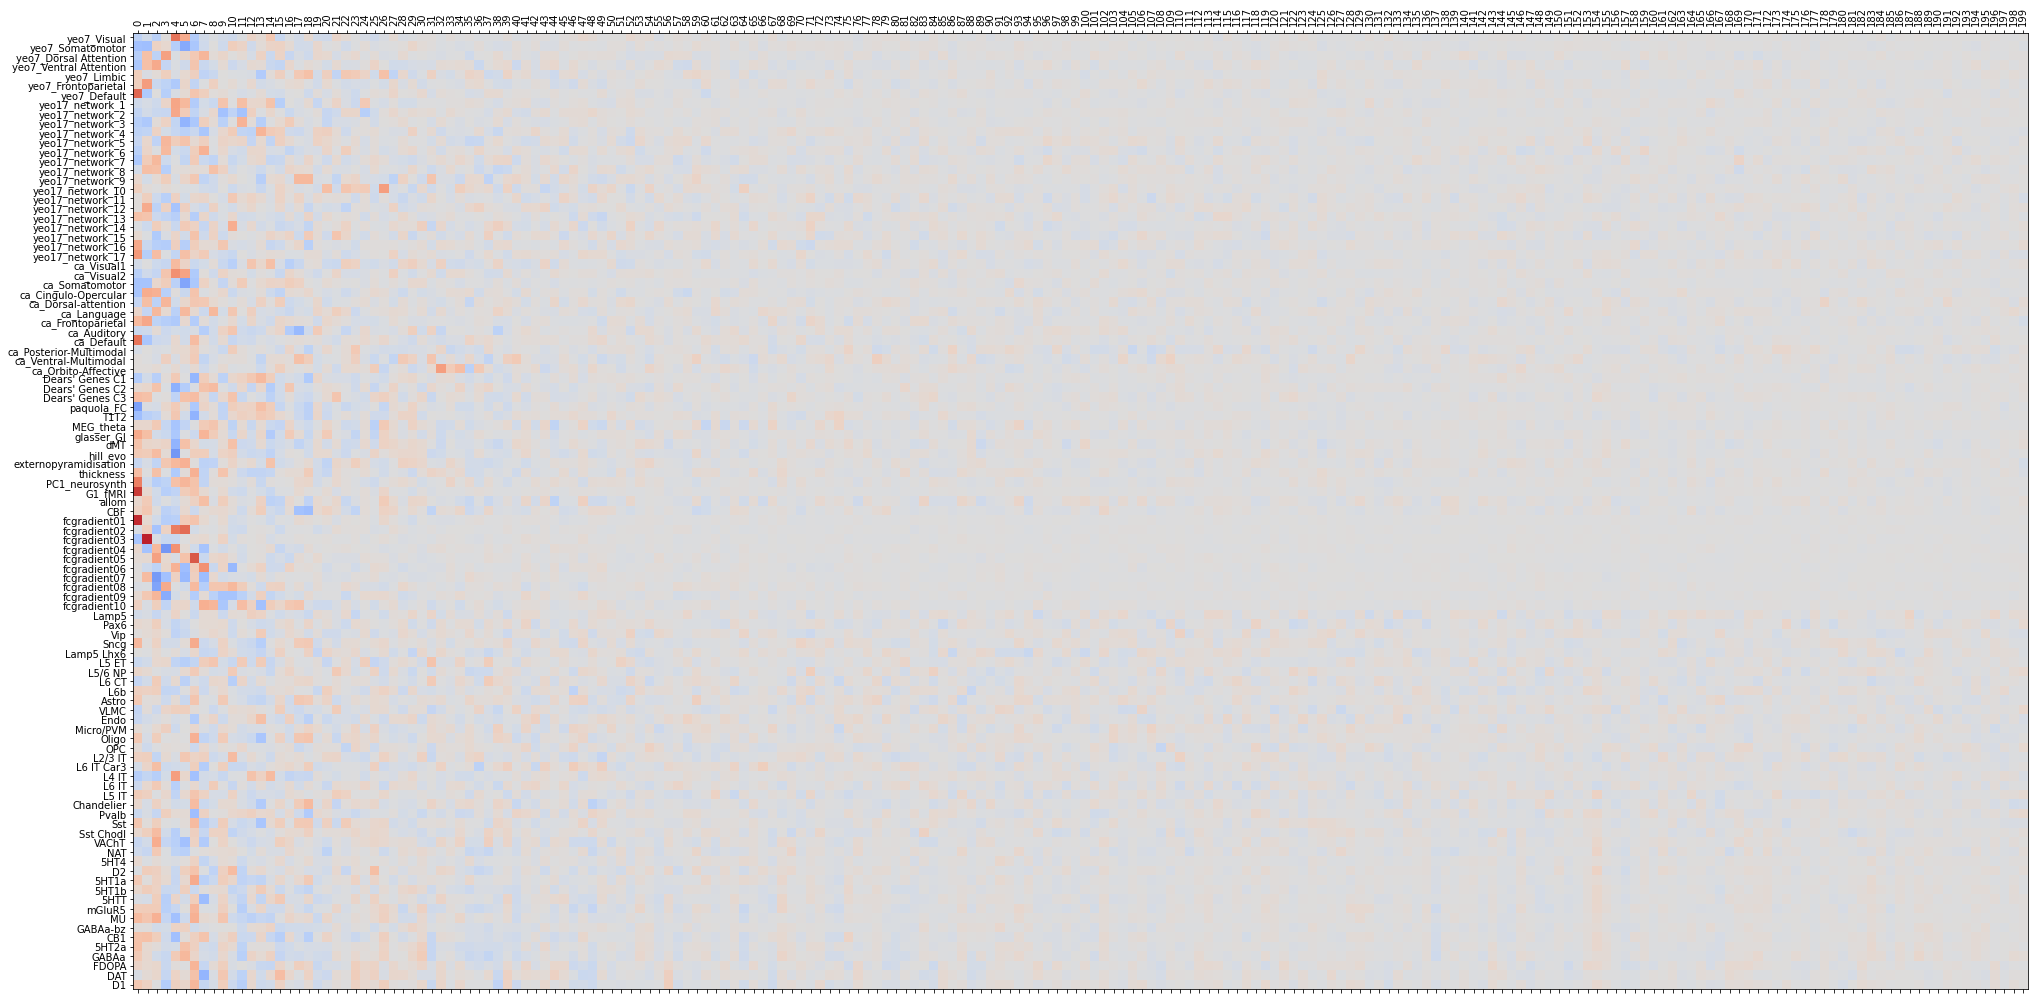

In [11]:
ax = plt.figure(figsize=(30,14)).gca()
ax.matshow(corrs.T, vmin=-1, vmax=1, cmap="coolwarm")
plt.yticks(np.arange(refmaps.shape[0]), refnames);
plt.xticks(np.arange(corrs.shape[0]), rotation=90);
plt.tight_layout()

## Plot first 15 RS-PCA components along with reference maps

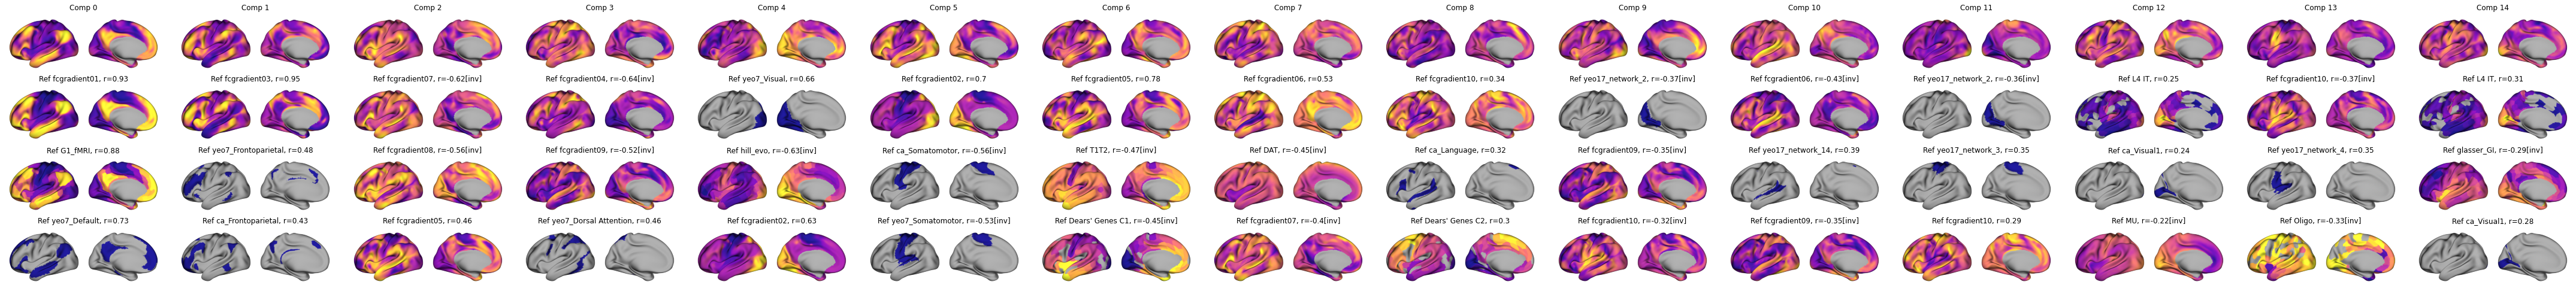

In [12]:
n_comps = 15;
n_refs = 3;

fig, axs = plt.subplots(n_refs+1,n_comps, figsize=(n_comps* 4 , (n_refs+1)*1.7))
faxs = axs.flatten(); 
for i in range(len(faxs)): faxs[i].axis("off");

for i in range(n_comps):
  comp_data = pca.components_[i,:]
  f = show_pdata(comp_data, cmap="plasma", ld = None, cbar = False)
  pimg = fig2pil(f); plt.close(f)
  axs[0, i].imshow(pimg)
  axs[0, i].set_title(f"Comp {i}")

  tmp = corrs[i, :]
  best_ref_ids = np.argsort(np.absolute(tmp))[::-1]

  for j in range(n_refs):
    ref_id = best_ref_ids[j]
    cval = round(tmp[ref_id].item(),2);
    anticorr = cval < 0;
    ref_data = refmaps[ref_id, :]
    if anticorr: ref_data = ref_data*-1;
    f = show_pdata(ref_data, cmap="plasma", ld = None, cbar = False)
    pimg = fig2pil(f); plt.close(f)
    axs[1+j, i].imshow(pimg)
    axs[1+j,i].set_title(f"Ref {refnames[ref_id]}, r={cval}" + ("[inv]" if anticorr else ""))


plt.subplots_adjust(wspace=0, hspace=0);
plt.tight_layout()
plt.show()


## Task specific components with reference maps

In [8]:
print(mean_task_maps.shape)
print(coeffs.shape, best_coeffs.shape, corrs.shape)
print(pca.components_.shape, refmaps.shape)

sources2display = ['fcgrads', 'CA', 'Receptors', 'DearGenes','Neuromaps']

(29696, 47)
(47, 200) (47, 200) (200, 101)
(200, 29696) (101, 29696)


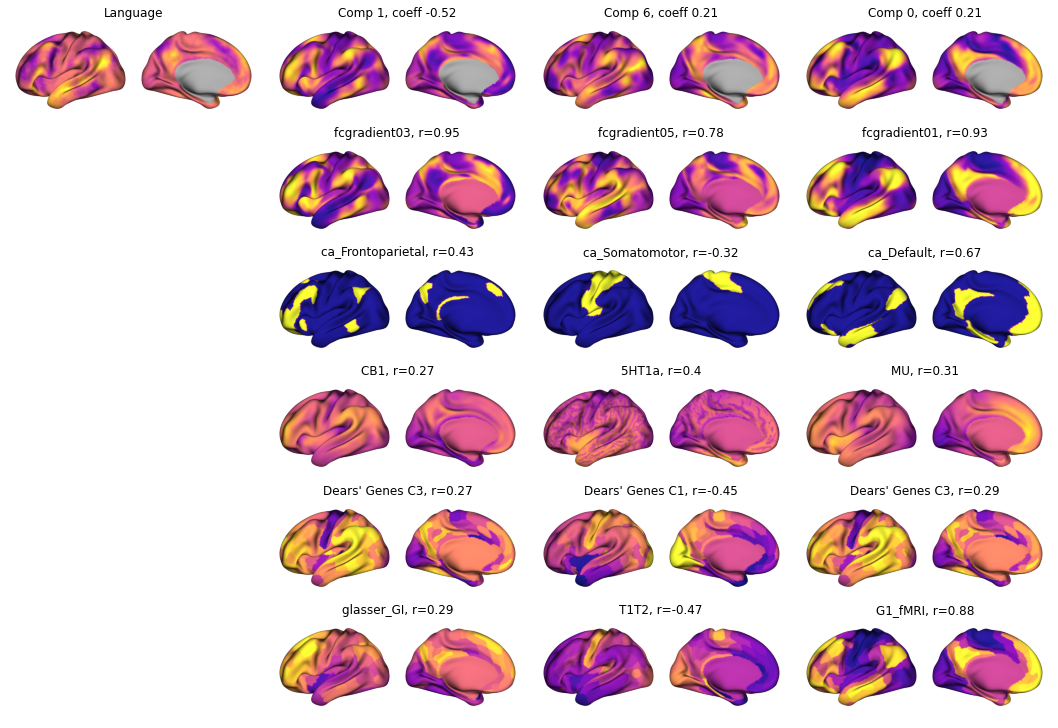

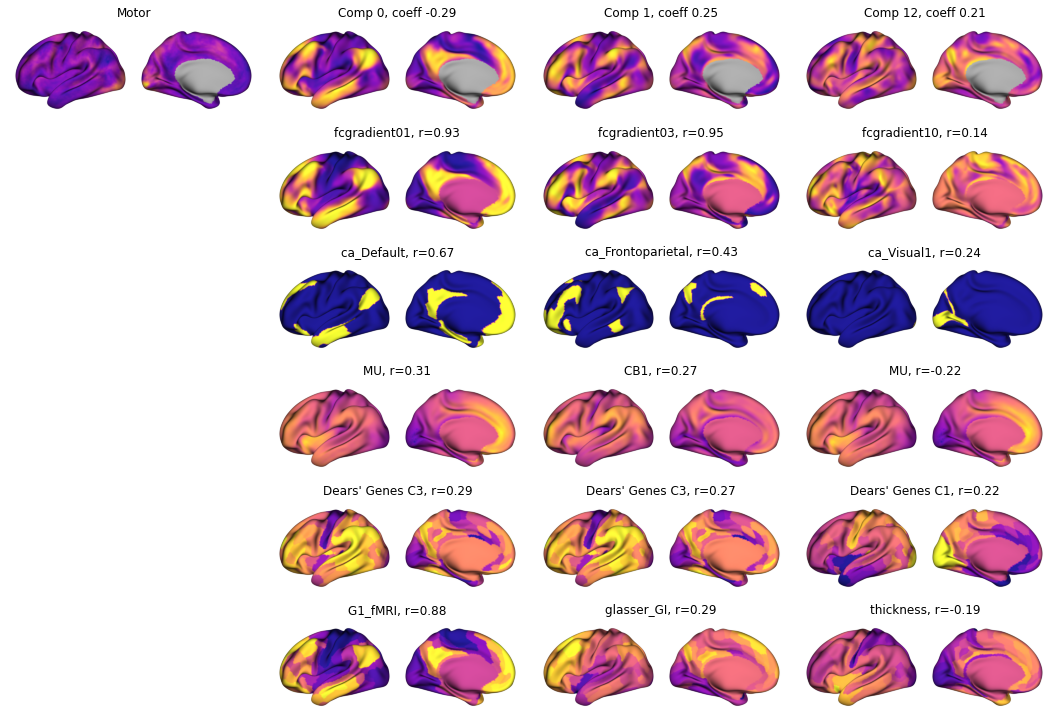

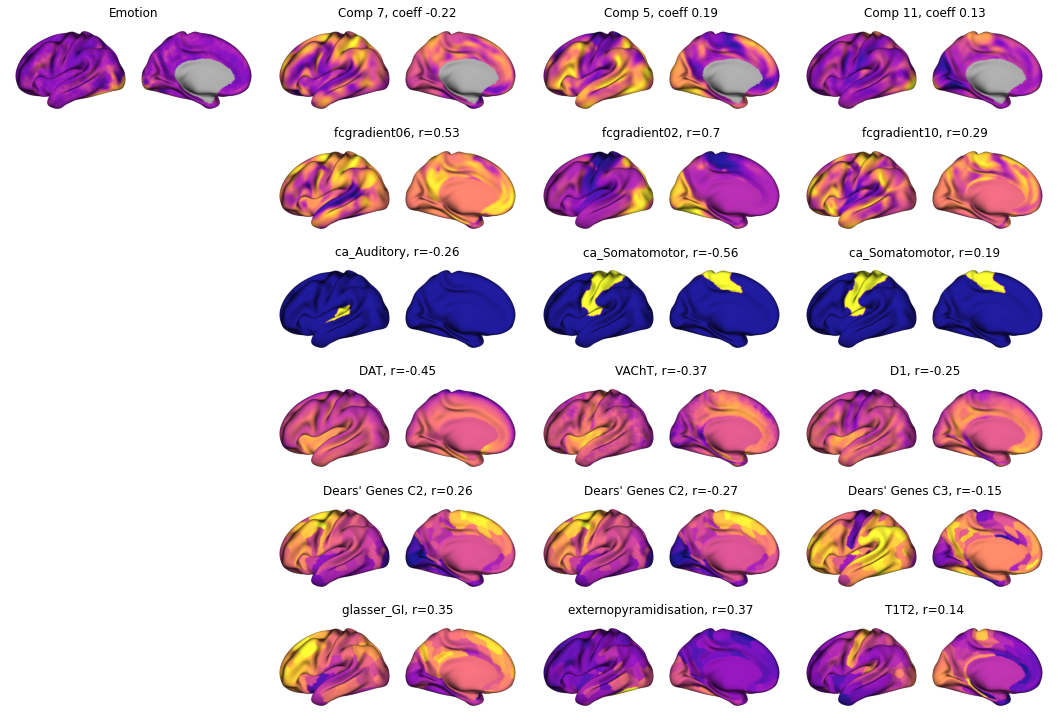

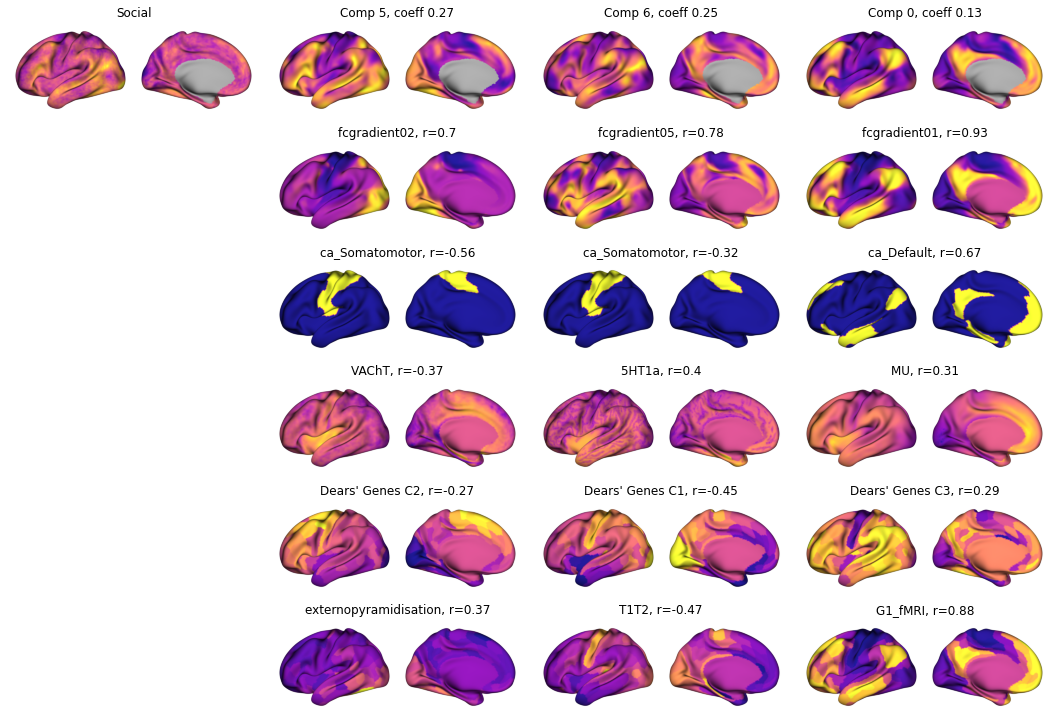

In [20]:
n_rows = len(sources2display) + 1
n_cols = 4

for cname in ['Language', 'Motor', 'Emotion', 'Social']:

    i = task_names.index(cname) ;
    cid = contrast_ids_to_show[i]
    tname = task_names[i]

    # Create figure
    fig, axs = plt.subplots(n_rows,n_cols, figsize=((n_cols)*3.7, 1.7*n_rows))#, gridspec_kw=gskw) 
    faxs = axs.flatten()
    for i in range(len(faxs)): faxs[i].axis("off");


    # First row: just show the task and its rs components

    f = show_pdata(mean_task_maps[:, cid], cmap="plasma", ld = None, cbar = False)
    pimg = fig2pil(f); plt.close(f)
    axs[0, 0].imshow(pimg)
    axs[0,0].set_title(tname)

    for j in range(n_cols-1):
        rsid = best_coeffs[cid, j]
        cf = np.round(coeffs[cid, rsid].item(), 2)
        comp_data = pca.components_[rsid]
        #if cf < 0:
        # cf, comp_data = -1*cf, -1*comp_data

        f = show_pdata(comp_data, cmap="plasma", ld = None, cbar = False)
        pimg = fig2pil(f); plt.close(f)
        axs[0, 1+j].imshow(pimg)
        
        axs[0, 1+j].set_title(f"Comp {rsid}, coeff {cf}")

    # next rows: show how those components relate to RS networks?

    for row_id in range(len(sources2display)):
        src = sources2display[row_id]
        sids = np.where(np.array(source) == src)[0]
        snames = np.array(refnames)[sids]

        for j in range(n_cols-1):
            rsid = best_coeffs[cid, j] # 0==j
            tmp = corrs[rsid, sids]
            best = np.argsort(np.absolute(tmp))[::-1][0]

            f = show_pdata(refmaps[sids[best]], cmap="plasma", ld = None, cbar = False, zero_transparent=False)
            pimg = fig2pil(f); plt.close(f)
            axs[row_id+1, 1+j].imshow(pimg)
            title = f"{snames[best]}, r={round(tmp[best].item(),2)}"
            axs[row_id+1, 1+j].set_title(title)

    plt.subplots_adjust(wspace=0, hspace=0);
    plt.tight_layout()
    plt.show()


In [21]:
plt.close("all")

## Final figure for the paper

In [20]:
# we need an individual prediction for the first row
regr_data = np.load("results/scores/linear_regression_scores_and_info_v3.yfull.aa.extended.small.npy", allow_pickle=1).item()
print(regr_data.keys(), "\n", regr_data['RS-PCA200'].keys())
subjs = regr_data["RS-PCA200"]["sub_test"]

modality = 'RS-PCA200'
y_test = regr_data[modality]['y_test']
y_test_pred = regr_data[modality]['y_test_pred']
subjs = regr_data[modality]['sub_test']

# and we need also the individual level rs-pca compoentns for the first row
xtest = np.load("data/xdata_rspca.51subj.200comps.test.yfull.npy", allow_pickle=1)
xtest.shape

dict_keys(['RS-PCA200', 'FS-StructuralMaps']) 
 dict_keys(['scoresd', 'diff_scores_test', 'y_test', 'y_test_pred', 'skr', 'sub_test'])


(51, 29696, 200)

In [21]:
print(np.unique(source))
sources2display = ['fcgrads', 'CA', 'Receptors', 'CellTypes', 'DearGenes','Neuromaps']

# plt.rcParams["font.size"] default is 10
plt.rcParams.update({'font.size': 10})


['CA' 'CellTypes' 'DearGenes' 'Neuromaps' 'Receptors' 'Yeo17' 'Yeo7'
 'fcgrads']


In [22]:
def show_pdata(data, ld = None, is_32k=False, cmap="coolwarm", mw_val=0, title=None, **kwargs):
  out = data if ld is None else map_to_labels(data, ld, mask=ld!=mw_val, fill=0)
  lcd = hcp.left_cortex_data(out) if not is_32k else out;
  #p = Plot(surf_lh=lh, size=(800, 300), zoom=1.7)
  p = Plot(surf_lh=lh, size=(800, 300), zoom=1.65)
  pkwargs = dict(cmap=cmap, cbar=True);
  pkwargs.update(kwargs)
  p.add_layer({'left': lcd},  **pkwargs)
  fig = p.build()
  if not(title is None): fig.axes[0].set_title(title)
  #fig.show()
  return fig

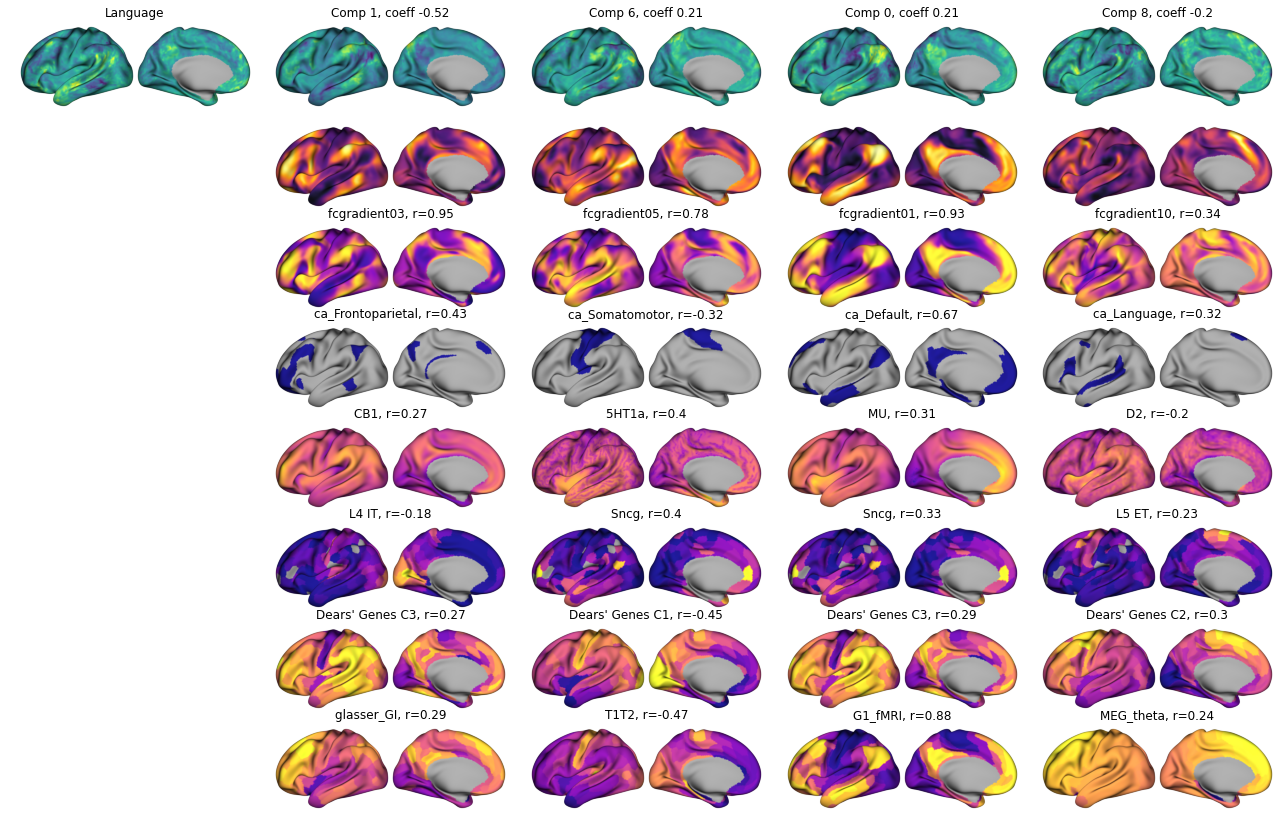

In [23]:
n_rows = len(sources2display) + 2
n_cols = 5

sn = 44

for cname in ['Language']: #, 'Motor Cue-Avg', 'Emoti Face-Shape', 'Social TOM-Rand']:

    i = task_names.index(cname) ;
    cid = contrast_ids_to_show[i]
    tname = task_names[i]

    # Create figure
    fig, axs = plt.subplots(n_rows,n_cols, figsize=((n_cols)*3.55, 1.4*n_rows))#, gridspec_kw=gskw) 
    faxs = axs.flatten()
    for i in range(len(faxs)): faxs[i].axis("off");


    # First row: just show the task and its rs components

    #f = show_pdata(mean_task_maps[:, cid], cmap="plasma", ld = None, cbar = False)
    f = show_pdata(y_test[sn, :, cid], cmap="viridis", ld = None, cbar = False)

    pimg = fig2pil(f); plt.close(f)
    axs[0, 0].imshow(pimg)
    axs[0,0].set_title(tname)

    for j in range(n_cols-1):
        rsid = best_coeffs[cid, j]
        cf = np.round(coeffs[cid, rsid].item(), 2)
        indiv_comp_data = xtest[sn, :, rsid]
        group_comp_data = pca.components_[rsid]

        #if cf < 0:
        # cf, comp_data = -1*cf, -1*comp_data

        f = show_pdata(indiv_comp_data, cmap="viridis", ld = None, cbar = False)
        pimg = fig2pil(f); plt.close(f)
        axs[0, 1+j].imshow(pimg)
        axs[0, 1+j].set_title(f"Comp {rsid}, coeff {cf}")

        f = show_pdata(group_comp_data, cmap="inferno", ld = None, cbar = False)
        pimg = fig2pil(f); plt.close(f)
        axs[1, 1+j].imshow(pimg)

    # next rows: show how those components relate to RS networks?

    for row_id in range(len(sources2display)):
        src = sources2display[row_id]
        sids = np.where(np.array(source) == src)[0]
        snames = np.array(refnames)[sids]

        for j in range(n_cols-1):
            rsid = best_coeffs[cid, j] # 0==j
            tmp = corrsz[rsid, sids] # corrs
            best = np.argsort(np.absolute(tmp))[::-1][0]
            src = source[sids[best]]
            zt = True if src.startswith("Yeo") or src=="CA" else False
            #f = show_pdata(refmaps[sids[best]], cmap="plasma", ld = None, cbar = False, zero_transparent=zt)
            dmap= refmaps[sids[best]] if zt else zrefmaps[sids[best]]

            f = show_pdata(hcp.left_cortex_data(dmap, fill=np.nan), is_32k=1, zero_transparent=zt, cbar = False, cmap="plasma")
            pimg = fig2pil(f); plt.close(f)
            axs[row_id+2, 1+j].imshow(pimg)
            title = f"{snames[best]}, r={round(tmp[best].item(),2)}"
            axs[row_id+2, 1+j].set_title(title)

    plt.tight_layout(pad=0)
    plt.subplots_adjust(wspace=0, hspace=0.13);
    
    plt.show()


In [24]:
plt.close("all")